In [1]:
# set the plots to display
%matplotlib inline

In [2]:
%pip install forex-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from forex_python.converter import CurrencyRates

In [114]:
def categorize_clothing_type(product_name):
    product_name = product_name.lower()
    if any(keyword in product_name for keyword in ['shirt', 't-shirt', 'blouse', 'jacket', 'suit', 'top']):
        return 'tops'
    elif any(keyword in product_name for keyword in ['pants', 'jeans', 'trousers']):
        return 'bottoms'
    elif any(keyword in product_name for keyword in ['shoes', 'sneakers', 'boots', 'mules', 'oxfords', 'heels', 'sandals']):
        return 'footwear'
    elif any(keyword in product_name for keyword in ['accessory', 'bag', 'scarf', 'backpack', 'cufflinks', 'belt', 'watch']):
        return 'accessories'
    else:
        return 'other'  # For items not falling into above categories

# Load your dataframe
clothing_catalog = pd.read_csv("./data/clothing_catalog.csv")

# Apply categorization function to 'ProductName' column
clothing_catalog['ClothingType'] = clothing_catalog['ProductName'].apply(categorize_clothing_type)

# Display the dataframe with the assigned clothing types
print(clothing_catalog.head())

   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gender  Price (INR)  NumImages  \
0  Unisex        11745          7   
1   Women         5810          7   
2   Women          899          7   
3     Men         5599          5   
4     Men          759          5   

                                         Description PrimaryColor ClothingType  
0  Black and grey printed medium trolley bag, sec...        Black  accessories  
1  Beige & Grey made to measure kurta with churid...        Beige         tops  
2  Pink coloured wash 5-pocket high-rise cropped ... 

In [116]:
# Conversion rate from INR to USD
INR_TO_USD = 0.014

# Function to generate random outfit
def generate_outfits(clothing_catalog, num_outfits=1, gender=None, brand=None, color=None):
    outfits = []
    for _ in range(num_outfits):
        outfit = {}
        total_price_inr = 0
        shuffled_catalog = clothing_catalog.sample(frac=1)  # Shuffle the dataframe to produce random outputs
        filtered_catalog = shuffled_catalog
        if gender:
            filtered_catalog = shuffled_catalog[shuffled_catalog['Gender'] == gender]
        if brand:
            filtered_catalog = filtered_catalog[filtered_catalog['ProductBrand'] == brand]
        if color:
            filtered_catalog = filtered_catalog[filtered_catalog['PrimaryColor'] == color]
        for index, row in filtered_catalog.iterrows():
            clothing_type = row['ClothingType']
            product_name = row['ProductName']
            price_inr = row['Price (INR)']  # Assuming price column is named 'Price (INR)'
            if clothing_type not in outfit:
                outfit[clothing_type] = product_name
                total_price_inr += price_inr
            if len(outfit) == 4:  # Adjust this number based on the number of clothing types you have
                break  # Stop if we have selected an item for each clothing type
        total_price_usd = total_price_inr * INR_TO_USD
        outfit['TotalPrice_USD'] = round(total_price_usd, 2)
        outfits.append(outfit)
    return outfits

# Example usage
generated_outfits = generate_outfits(clothing_catalog, num_outfits=3, gender='Men', color='Blue')
print("Generated Outfits:")
for i, outfit in enumerate(generated_outfits, start=1):
    print(f"Outfit {i}: {outfit}")

Generated Outfits:
Outfit 1: {'accessories': 'Titan Men Blue Analogue Watch 90099SL01', 'tops': 'Parx Men Blue Slim Fit Printed Casual Shirt', 'bottoms': 'Flying Machine Men Blue Jackson Skinny Fit Low-Rise Clean Look Stretchable Jeans', 'footwear': 'Puma Men Navy Blue Detector Running Shoes', 'TotalPrice_USD': 198.41}
Outfit 2: {'tops': 'Basics Men Blue Slim Fit Checked Casual Shirt', 'accessories': 'Titan Octane Hyper Lume Men Blue Analogue watch 90113KP02', 'other': 'U.S. Polo Assn. Men Navy Blue Solid Briefs Z9I100-656-PL', 'bottoms': 'HIGHLANDER Men Navy Blue & Grey Slim Fit Checked Regular Trousers', 'TotalPrice_USD': 163.56}
Outfit 3: {'footwear': 'Puma Men Navy Blue IGNITE Limitless Lean Modern Sneakers', 'tops': 'Mast & Harbour Men Red & Blue Printed Henley Neck T-shirt', 'bottoms': 'Indian Terrain Men Navy Blue Brooklyn Slim Fit Self-Design Trousers', 'other': 'DEYANN Men Blue & Grey Printed Straight Kurta', 'TotalPrice_USD': 108.28}


In [117]:
# Function to find the highest priced item based on gender, color, and brand
def find_highest_priced(clothing_catalog, gender=None, color=None, brand=None):
    filtered_catalog = clothing_catalog.copy()  # Make a copy to avoid SettingWithCopyWarning
    if gender:
        filtered_catalog = filtered_catalog[filtered_catalog['Gender'] == gender]
    if color:
        filtered_catalog = filtered_catalog[filtered_catalog['PrimaryColor'] == color]
    if brand:
        filtered_catalog = filtered_catalog[filtered_catalog['ProductBrand'] == brand]
    highest_priced_item = filtered_catalog.loc[filtered_catalog['Price (INR)'].idxmax()].copy()  # Make a copy
    highest_priced_item['Price_USD'] = highest_priced_item['Price (INR)'] * INR_TO_USD
    return highest_priced_item

# Function to find the lowest priced item based on gender, color, and brand
def find_lowest_priced(clothing_catalog, gender=None, color=None, brand=None):
    filtered_catalog = clothing_catalog.copy()  # Make a copy to avoid SettingWithCopyWarning
    if gender:
        filtered_catalog = filtered_catalog[filtered_catalog['Gender'] == gender]
    if color:
        filtered_catalog = filtered_catalog[filtered_catalog['PrimaryColor'] == color]
    if brand:
        filtered_catalog = filtered_catalog[filtered_catalog['ProductBrand'] == brand]
    lowest_priced_item = filtered_catalog.loc[filtered_catalog['Price (INR)'].idxmin()].copy()  # Make a copy
    lowest_priced_item['Price_USD'] = lowest_priced_item['Price (INR)'] * INR_TO_USD
    return lowest_priced_item

In [118]:
highest_priced_item = find_highest_priced(clothing_catalog)
print("Highest Priced Item:")
print(highest_priced_item['ProductName'])
print(round(highest_priced_item['Price_USD'], 2))
print(highest_priced_item['Gender'])

Highest Priced Item:
Garmin Unisex Blue Forerunner 945 Smartwatch 010-02063-71
883.26
Unisex


In [119]:
# Filter men's clothing
mens_clothing = clothing_catalog[clothing_catalog['Gender'] == 'Men'].copy()

# Convert prices to USD
mens_clothing['Price_USD'] = mens_clothing['Price (INR)'] * INR_TO_USD

# Calculate average price by category
mens_average_pricing = mens_clothing.groupby('ClothingType')['Price_USD'].mean()

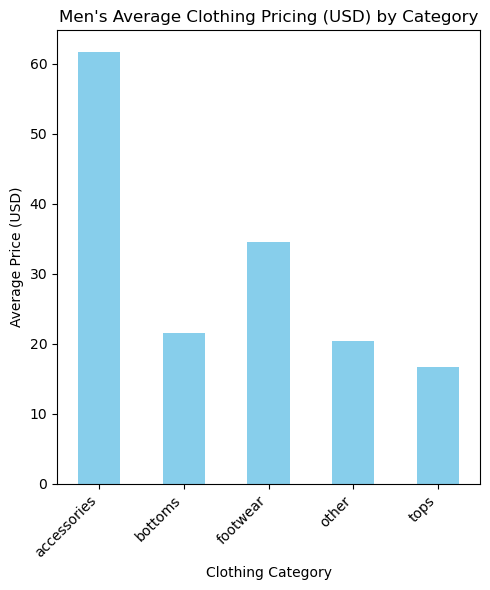

In [125]:
# Plot the average prices
plt.figure(figsize=(5, 6))
mens_average_pricing.plot(kind='bar', color='skyblue')
plt.title("Men's Average Clothing Pricing (USD) by Category")
plt.xlabel("Clothing Category")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [121]:
# Filter women's clothing
womens_clothing = clothing_catalog[clothing_catalog['Gender'] == 'Women'].copy()

# Convert prices to USD
womens_clothing['Price_USD'] = womens_clothing['Price (INR)'] * INR_TO_USD

# Calculate average price by category
womens_average_pricing = womens_clothing.groupby('ClothingType')['Price_USD'].mean()

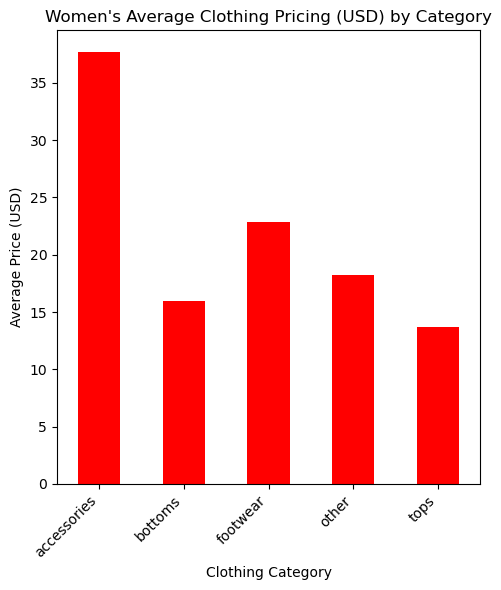

In [126]:
# Plot the average prices
plt.figure(figsize=(5, 6))
womens_average_pricing.plot(kind='bar', color='red')
plt.title("Women's Average Clothing Pricing (USD) by Category")
plt.xlabel("Clothing Category")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

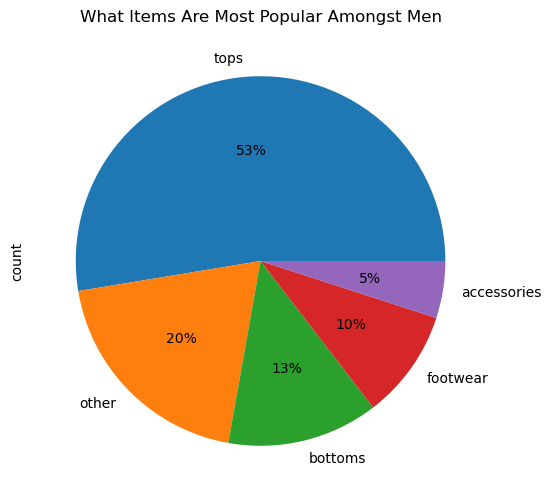

In [129]:
# Filter men's clothing
mens_clothing = clothing_catalog[clothing_catalog['Gender'] == 'Men']

# Count occurrences of each clothing type
popular_clothing_types = mens_clothing['ClothingType'].value_counts()

# Plot the most popular clothing type
plt.figure(figsize=(10, 6))
popular_clothing_types.plot(kind='pie', title='What Items Are Most Popular Amongst Men', autopct='%1.0f%%');


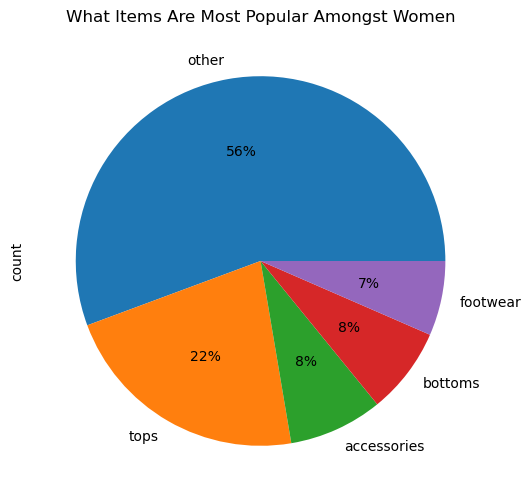

In [130]:
# Filter women's clothing
womens_clothing = clothing_catalog[clothing_catalog['Gender'] == 'Women']

# Count occurrences of each clothing type
popular_clothing_types = womens_clothing['ClothingType'].value_counts()

# Plot the most popular clothing type
plt.figure(figsize=(10, 6))
popular_clothing_types.plot(kind='pie', title='What Items Are Most Popular Amongst Women', autopct='%1.0f%%');

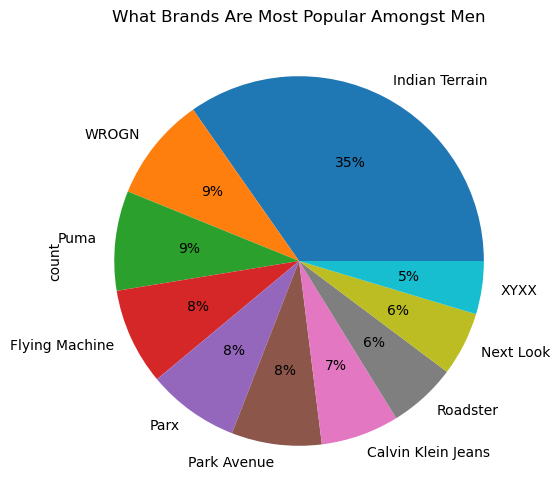

In [132]:
# Filter men's clothing
mens_clothing = clothing_catalog[clothing_catalog['Gender'] == 'Men']

# Count occurrences of each brand
brand_counts = mens_clothing['ProductBrand'].value_counts()

# Select the top 10 brands
top_10_brands = brand_counts.head(10)

# Plot the top 10 brands
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='pie', title='What Brands Are Most Popular Amongst Men', autopct='%1.0f%%');

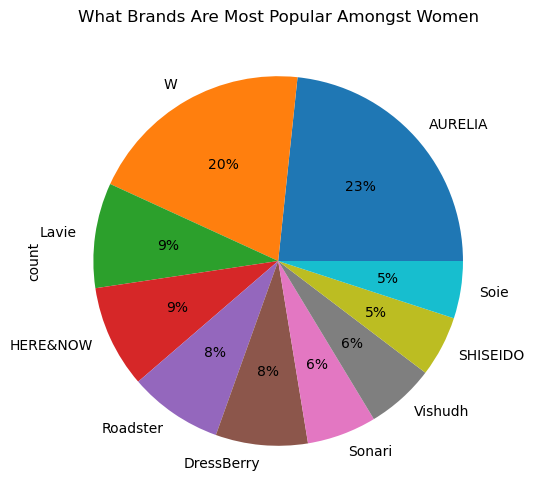

In [133]:
# Filter women's clothing
womens_clothing = clothing_catalog[clothing_catalog['Gender'] == 'Women']

# Count occurrences of each brand
brand_counts = womens_clothing['ProductBrand'].value_counts()

# Select the top 10 brands
top_10_brands = brand_counts.head(10)

# Plot the top 10 brands
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='pie', title='What Brands Are Most Popular Amongst Women', autopct='%1.0f%%');